# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


## Inicialización

In [1]:
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

import matplotlib.pyplot as plt

Como primer paso, revisaremos el archivo de etiquetas, con sus tipos tipos de datos y cantidades.

In [2]:
labels= pd.read_csv('/datasets/faces/labels.csv')
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [3]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


Analisis de la distribucion de edades

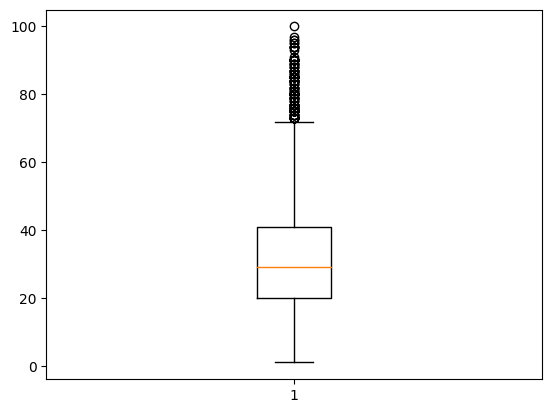

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.boxplot(labels['real_age'])
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Excelente comienzo. Has importado correctamente las librerías necesarias y comenzado con una exploración adecuada de los datos, incluyendo un análisis visual claro de la variable objetivo. Esta base es fundamental para avanzar con solidez en el proyecto. </div>

## Carga los datos

El conjunto de datos se almacena en la carpeta `/datasets/faces/` 
- La carpeta `final_files` con 7600 fotos 
- El archivo `labels.csv` con etiquetas, con dos columnas: `file_name` y `real_age` 
Dado que el número de archivos de imágenes es bastante elevado, se recomienda evitar leerlos todos a la vez, ya que esto consumiría muchos recursos computacionales. Te recomendamos crear un generador con ImageDataGenerator. Este método se explicó en el capítulo 3, lección 7 de este curso.

El archivo de etiqueta se puede cargar como un archivo CSV habitual.

In [6]:
datagen = ImageDataGenerator(rescale=1.0 / 255)
flujo_imagenes=datagen.flow_from_dataframe(dataframe=labels,
    directory='/datasets/faces/final_files',
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode= 'raw',
    seed =12345                                    
)

Found 7591 validated image filenames.


In [8]:
features, target = next(flujo_imagenes)

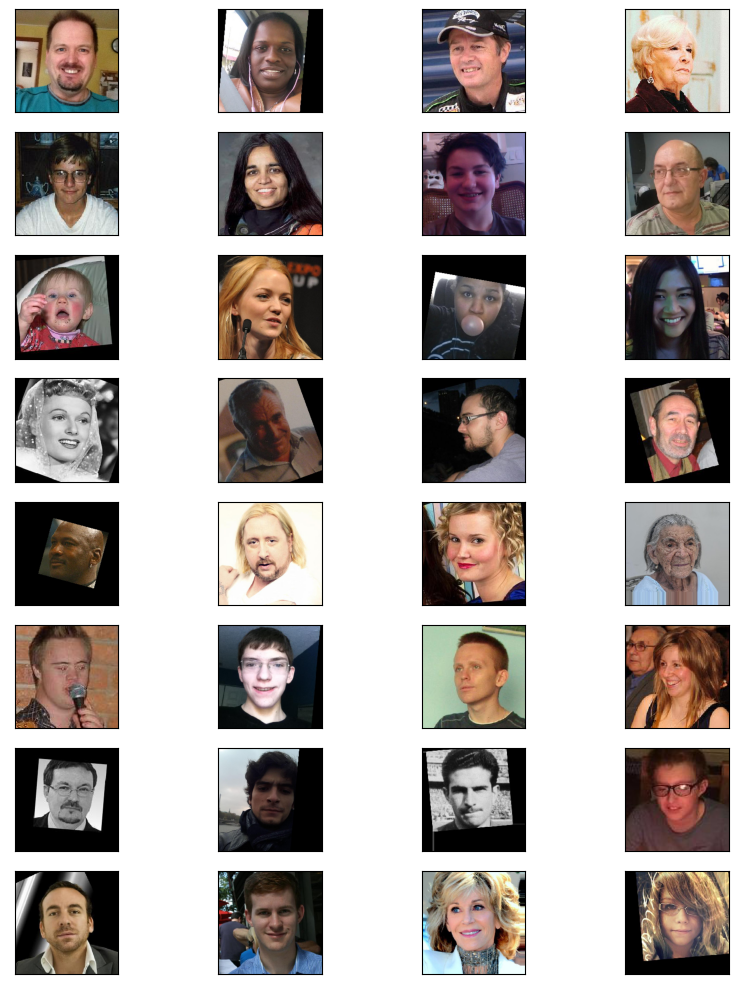

In [9]:
fig = plt.figure(figsize=(10,10))
for i in range(32):
    fig.add_subplot(8, 4, i+1)
    plt.imshow(features[i])
	# quita los ejes y coloca las imágenes cerca para obtener un output más compacto
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

In [16]:
def load_train(path):
    etiquetas = pd.read_csv(path+'labels.csv')
    generador_imagenes = ImageDataGenerator(rescale=1./255, validation_split=0.25)
    flujo_imagenes = generador_imagenes.flow_from_dataframe (
    dataframe = etiquetas,
    directory = path + 'final_files/' ,
    x_col='file_name',
    y_col=real_age, 
    target_size=(224,244), 
    batch_size=32, 
    class_mode='raw',
    subset='training', 
    horizontal_flip=True, 
    vertical_flip=True, 
    rotation_range=90,
    seed=42
    )
    return flujo_imagenes


In [18]:
def load_test(path):
    etiquetas = pd.read_csv(path+'labels.csv')
    generador_imagenes = ImageDataGenerator(rescale=1./255, validation_split=0.25)
    flujo_imagenes = generador_imagenes.flow_from_dataframe(
    dataframe = etiquetas,
    directory = path + 'final_files/',
    x_col='file_name',
    y_col=real_age, 
    target_size=(224,244), 
    batch_size=32, 
    class_mode='raw',
    subset='validation', 
    horizontal_flip=True, 
    vertical_flip=True, 
    rotation_range=90,
    seed=42
    )
    return flujo_imagenes

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Muy buen trabajo al configurar correctamente el generador de imágenes y visualizar ejemplos del conjunto. Además, la preparación modular mediante funciones para cargar los datos de entrenamiento y validación muestra una estructura organizada y reutilizable en tu código. </div>

## EDA

In [19]:
def create_resnet_model(input_shape):
    backbone = ResNet50(input_shape=input_shape, weights='imagenet', include_top=False)
    
    # entrenemos la parte de clasificación
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    # también podrías agregar una capa dense aquí: model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='relu'))
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model

In [22]:
def train_model(model, train_data, test_data, epochs=10, batch_size=None ,steps_per_epoch=None, validation_steps=None):

    model.fit(
        train_data,
        batch_size,
        steps_per_epoch, 
        validation_steps=None,
        epochs=epochs,
        verbose=2,
        shuffle = True
    )
    return model

### Conclusiones

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Excelente estructura al definir una arquitectura basada en ResNet50 y configurar su entrenamiento. El uso de una función modular para construir y entrenar el modelo facilita su reutilización y ajuste. La elección del optimizador y la métrica también son apropiadas para el problema de regresión. </div>

## Modelado

Define las funciones necesarias para entrenar tu modelo en la plataforma GPU y crea un solo script que las contenga todas junto con la sección de inicialización.

Para facilitar esta tarea, puedes definirlas en este notebook y ejecutar un código listo en la siguiente sección para componer automáticamente el script.

Los revisores del proyecto también verificarán las definiciones a continuación, para que puedan comprender cómo construiste el modelo.

In [ ]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
def load_train(path):
    
    """
    Carga la parte de entrenamiento del conjunto de datos desde la ruta.
    """
    
    # coloca tu código aquí

    return train_gen_flow

In [ ]:
def load_test(path):
    
    """
    Carga la parte de validación/prueba del conjunto de datos desde la ruta
    """
    
    # coloca tu código aquí

    return test_gen_flow

In [ ]:
def create_model(input_shape):
    
    """
    Define el modelo
    """
    
    # coloca tu código aquí

    return model

In [ ]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Entrena el modelo dados los parámetros
    """
    
    # # coloca tu código aquí

    return model

## Prepara el script para ejecutarlo en la plataforma GPU

Una vez que hayas definido las funciones necesarias, puedes redactar un script para la plataforma GPU, descargarlo a través del menú "File|Open..." (Archivo|Abrir) y cargarlo más tarde para ejecutarlo en la plataforma GPU.

Nota: el script debe incluir también la sección de inicialización. A continuación se muestra un ejemplo.

In [ ]:
# prepara un script para ejecutarlo en la plataforma GPU

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    f.write(init_str.strip() + '\n\n')

    for fn_name in [load_train, load_test, create_resnet_model, train_model]:
        src = inspect.getsource(fn_name)
        f.write(src + '\n\n')

### El resultado

Coloca el resultado de la plataforma GPU como una celda Markdown aquí.

## Conclusiones

# Lista de control

- [ ]  El Notebook estaba abierto 
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución
- [ ]  Se realizó el análisis exploratorio de datos 
- [ ]  Los resultados del análisis exploratorio de datos se presentan en el notebook final 
- [ ]  El valor EAM del modelo no es superior a 8 
- [ ]  El código de entrenamiento del modelo se copió en el notebook final 
- [ ]  El resultado de entrenamiento del modelo se copió en el notebook final 
- [ ] Los hallazgos se proporcionaron con base en los resultados del entrenamiento del modelo

# Comentario general del revisor 

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - 
    
¡Hola Ann! Gracias por incluir el código mínimo necesario para la etapa de modelado. Esto permite evaluar con claridad tu enfoque. Además, es excelente que utilices **ResNet50**, una red neuronal convolucional profunda preentrenada sobre ImageNet, conocida por su capacidad para extraer características complejas en imágenes a través de bloques residuales que facilitan el entrenamiento de modelos profundos. Muy buen criterio en la elección del backbone. </div>